In [24]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [25]:
data = pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [26]:
data.shape
# 8124개의 데이터
# 입력 특성(22개) + 정답 (1개)

(8124, 23)

In [27]:
# 데이터 정보 확인
data.info()

# 1. 결측치는 없다
# 2. 데이터 타입 -> 전부 object(문자열)
# 사이킷런의 알고리즘은 문자열 값을 입력값으로 받지 않음 -> 수치 형태로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 문제와 정답으로 분리
- 문제 데이터 X (특성, 속성, 피처, 독립변수) 로 불린다 : poisonous를 제외한 모든 다른컬럼
- 정답 데이터 y (정답, 라벨, 레이블, 타겟, 종속변수) : poisonous

In [28]:
# X_data = data.iloc[: ,1:]
# X = data.loc[:, 'cap-shape':]
# y = data['poisonous']

# 특정 칼럼만 삭제 (열 방향)
X = data.drop('poisonous', axis = 1)
y = data['poisonous']

#### 데이터 전처리
- 문자열 데이터 -> 수치형 (Econding)

In [29]:
y.value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [30]:
# 기술통계량 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [31]:
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [32]:
# 원 핫 인코딩 : 값의 크고 작음에 의막 없을 때 사용 (상하 관계가 없을 때)
# 인코딩을 하여 칼럼의 갯수가 늘어났다
X_one_hot = pd.get_dummies(X, dtype = 'int64')
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


#### train, test 데이터 분리

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_one_hot, 
    y,
    test_size=0.3, 
    random_state=1
)

In [53]:
# 분리후 출력
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5686, 117) (5686,)
(2438, 117) (2438,)


#### 모델링
1. 모델 객체 생성
2. 모델 학습
3. 모델 평가

In [35]:
# 모델 객체 생성 / 하이퍼파라미터 조정 안해봄
tree_model = DecisionTreeClassifier()

In [36]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
# 모델 평가
tree_model.score(X_test, y_test)

# 1.0 -> 정화도 100%

1.0

#### 하이퍼 파라미터 조절한 모델링

In [47]:
# 모델 객체 생성
tree_model2 = DecisionTreeClassifier(max_depth = 3)

In [48]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
tree_model2.score(X_test, y_test)

0.9881050041017228

In [41]:
# 우리가 보유한 데이터는 한정적 : 데이터가 만을 수록 과대 적합을 제어 할 수 있는데
# 데이터수 변화 없이 여러번의 검정할 벙법은 없을까??
# 교차 검증 : 보유한 데이터를 여러번 활용해서 검증 하여 성는을 확인
# 일반화 정도를 확인

In [50]:
# 교차 검증 도구 불러오기
from sklearn.model_selection import cross_val_score

In [57]:
# cross_val_score = 모델 훈령용 문제 훈련용 정답 cv = 교차 검증 횟수
cross_val_score(tree_model, X_train, y_train, cv = 5)

array([1.        , 0.99912049, 1.        , 1.        , 1.        ])

In [52]:
cross_val_score(tree_model2, X_train, y_train, cv = 5)

array([0.98418278, 0.97801231, 0.98240985, 0.98592788, 0.9648197 ])

In [ ]:
print(f'{cross_val_score}')
print(f'평균: {cross_val_score.mean()}')

#### 트리모델 내부 시각화
- 외부 라이브러리 설치

In [56]:
# 외부 라이브러리 설치
!pip install graphviz

# graph 경로 설정
import os

os.environ['PATH'] += os.pathsep+'C:/Program Files/Graphviz/bin'

In [62]:
# 현재 우리가 만든 모델을 dot 형태의 파일로 내보내기
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model, # 모델
    out_file = 'data/tree.dot', # 저장할 경로/ 파일명,확장자
    class_names = ['독', '식용'],
    feature_names = X_one_hot.columns, # 인코딩 된 컬럼 이름으로 특성 넣어줌
    filled = True, # 각 노드들의 클래스가 구분되도록 색을 칠해주느냐
    impurity = True, # 지니 불순도 출력 여부   
)

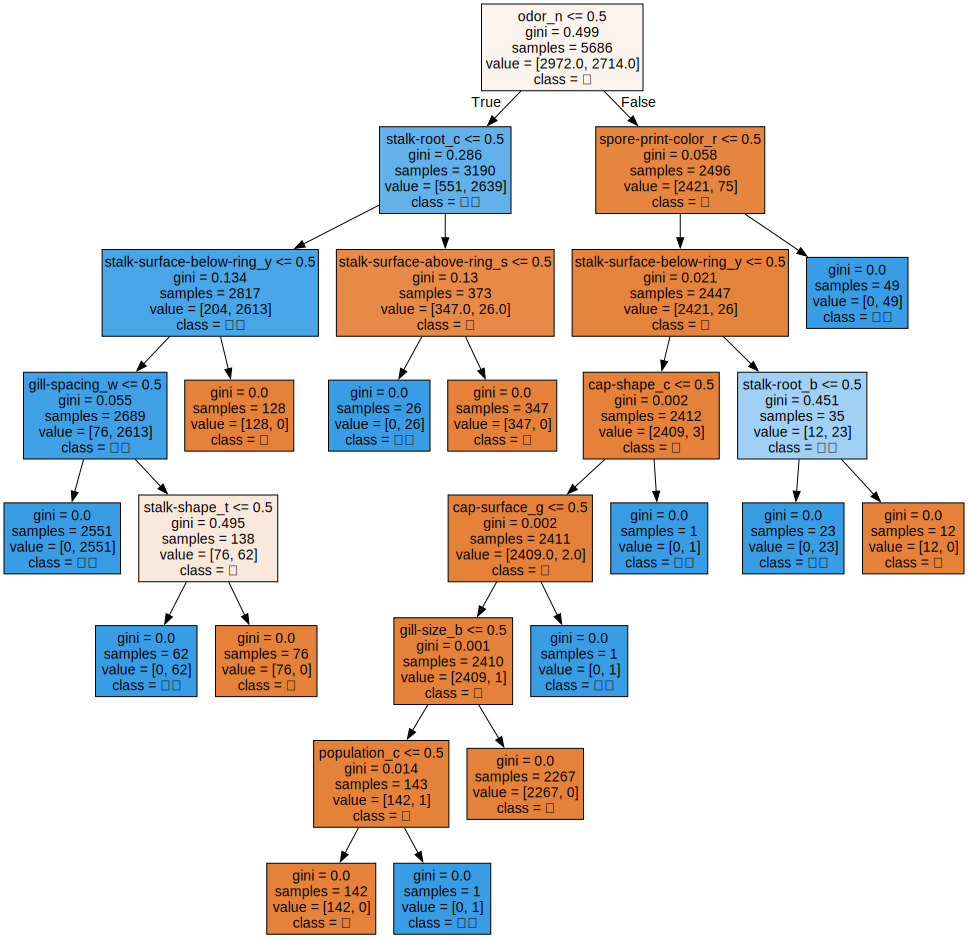

In [63]:
# dot 파일을 불러와서 실제 그래프로 표현
import graphviz

# 클래스 이름을 한글로 부여 했기 떄문에 한글 인코딩
with open ('./data/tree.dot', encoding='UTF-8') as f:
    dot_graph = f.read()

# 그래프 출력
graphviz.Source(dot_graph)

In [64]:
# tree_model2 로 해보자!
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model2, #
    out_file = 'data/tree2.dot', 
    class_names = ['독', '식용'],
    feature_names = X_one_hot.columns, #
    filled = True,
    impurity = True, 
)

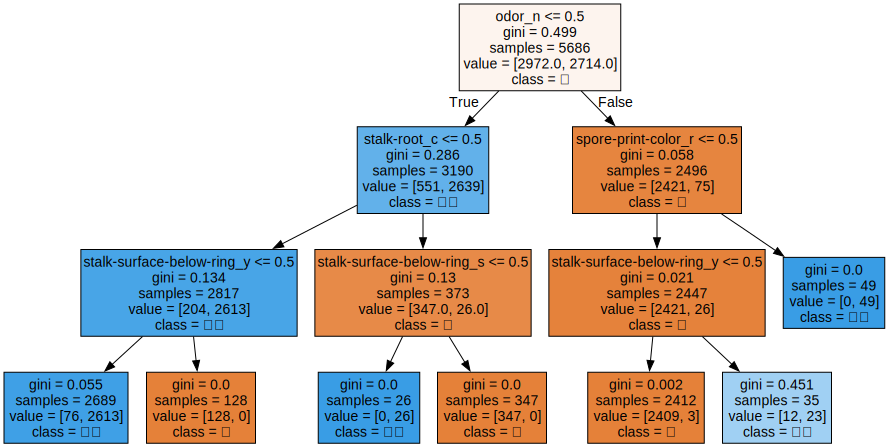

In [65]:
import graphviz

with open ('./data/tree2.dot', encoding='UTF-8') as f:
    dot_graph = f.read()

# 그래프 출력
graphviz.Source(dot_graph)

# odor_n >>진위 불순도를 파악 하기 위해

#### 특성 선택
- 각 특성들의 중요도를 출력해보자
- 정답에 얼마만큼의 영향을 미치는 특성인가를 수치로 확인이 가능하다
- 각 특성들의 중요도는 0 ~ 1 사이의 값을 가진다
- 모든 특성들의 중요도 합은 1
- tree 모델은 특성의 중요도가 가장 높은 값을 상위 질문(root node) 으로 배치

In [66]:
# tree model의 특성 중요도 확인 (지수 로그로 구성 되어있다)
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.03472773e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.04056568e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.27390666e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.79908419e-02, 4.63710198e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.40699064e-02, 0.00000000e+00,
       5.55890490e-03, 1.70884904e-01, 0.00000000e+00, 0.00000000e+00,
      

In [69]:
pd.set_option('display.max_rows',None)
# 행을 다 보이게  판다스 디스펠레이 옵션

In [70]:
# 중요도 DF 화
fi_df = pd.DataFrame(fi, index = X_one_hot.columns, columns = ['특성 중요도'])
fi_df

,특성 중요도
cap-shape_b,0.000000
cap-shape_c,0.000703
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
cap-surface_f,0.000000
cap-surface_g,0.000704
cap-surface_s,0.000000
cap-surface_y,0.000000


In [72]:
# 특성 중요도를 확인하기 위해 내림 차순 정렬
fi_df.sort_values(by = '특성 중요도', ascending = False)

,특성 중요도
odor_n,0.627391
stalk-root_c,0.170885
stalk-surface-below-ring_y,0.091794
spore-print-color_r,0.033148
gill-spacing_w,0.027991
stalk-shape_t,0.024070
stalk-surface-above-ring_s,0.017051
stalk-root_b,0.005559
cap-surface_g,0.000704
cap-shape_c,0.000703


#### 정리
- tree 모델 내부 시각화 표를 보면 중요도가 높은 특성인 odor_n이 최상단 질문으로 배치 되어있음 확인
- 중요도가 높은 컬럼은 가장 먼저 고려해야한다 -> 불순도가 낮아지는 방향으로 학습 하기 때문에
- 현재 버섯 데이터는 하나의 특성이 60% 넘는 중요도를 가지기 떄문에 모델 학습이 용이하다